<IPython.core.display.Javascript object>


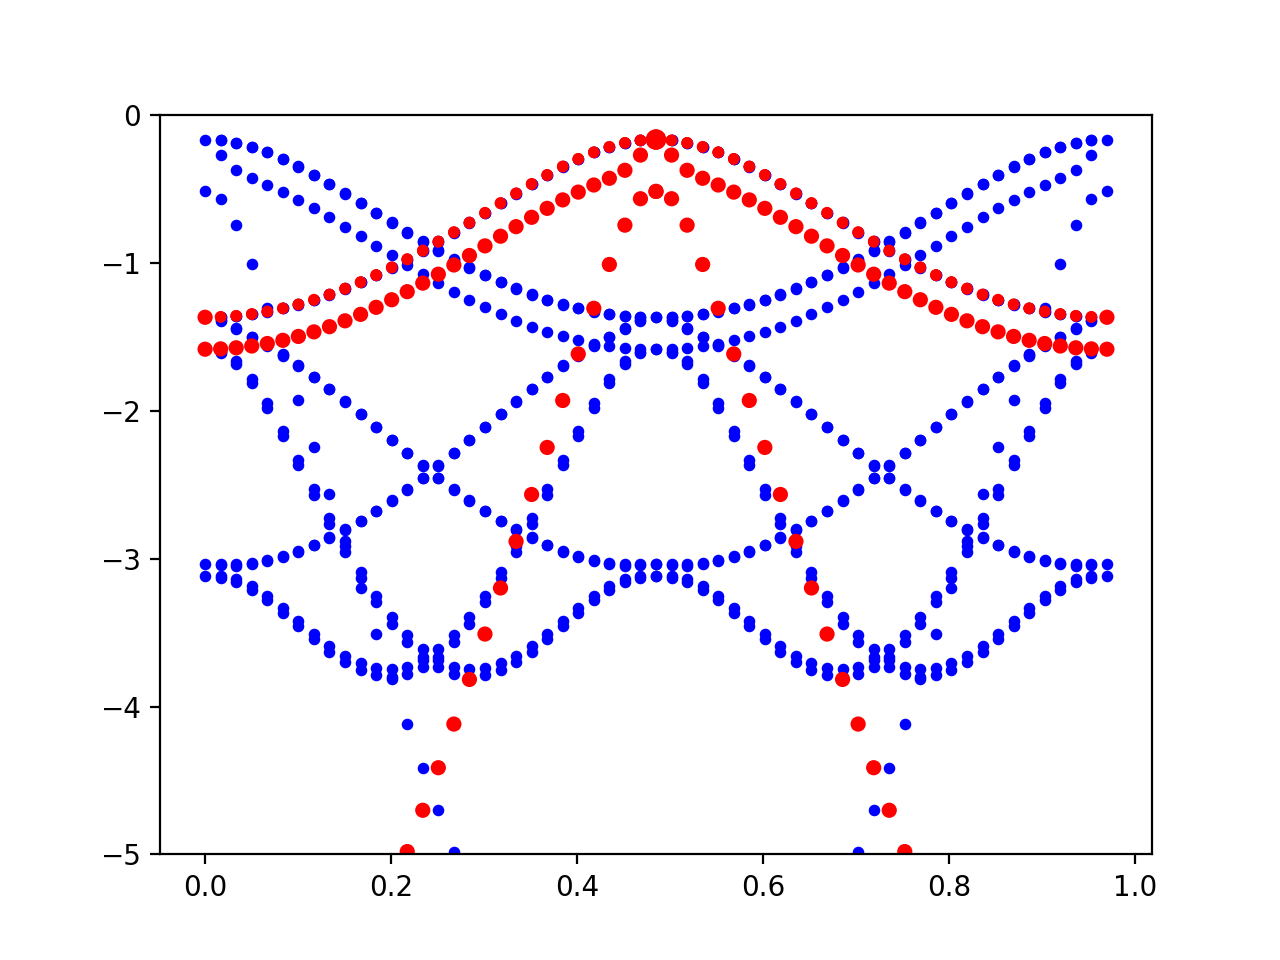

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

result = np.loadtxt('bandstructure_unfolded-path.txt')
plt.figure()
fatfactor = 10
ef = 7.08
plt.scatter(result[:,0],result[:,1]-ef,s=fatfactor,color="blue",label="supercell")
plt.scatter(result[:,0],result[:,1]-ef,s=result[:,2]*fatfactor,color="red",label="unfolded")
plt.ylim(-5, 0)
plt.show()

<IPython.core.display.Javascript object>


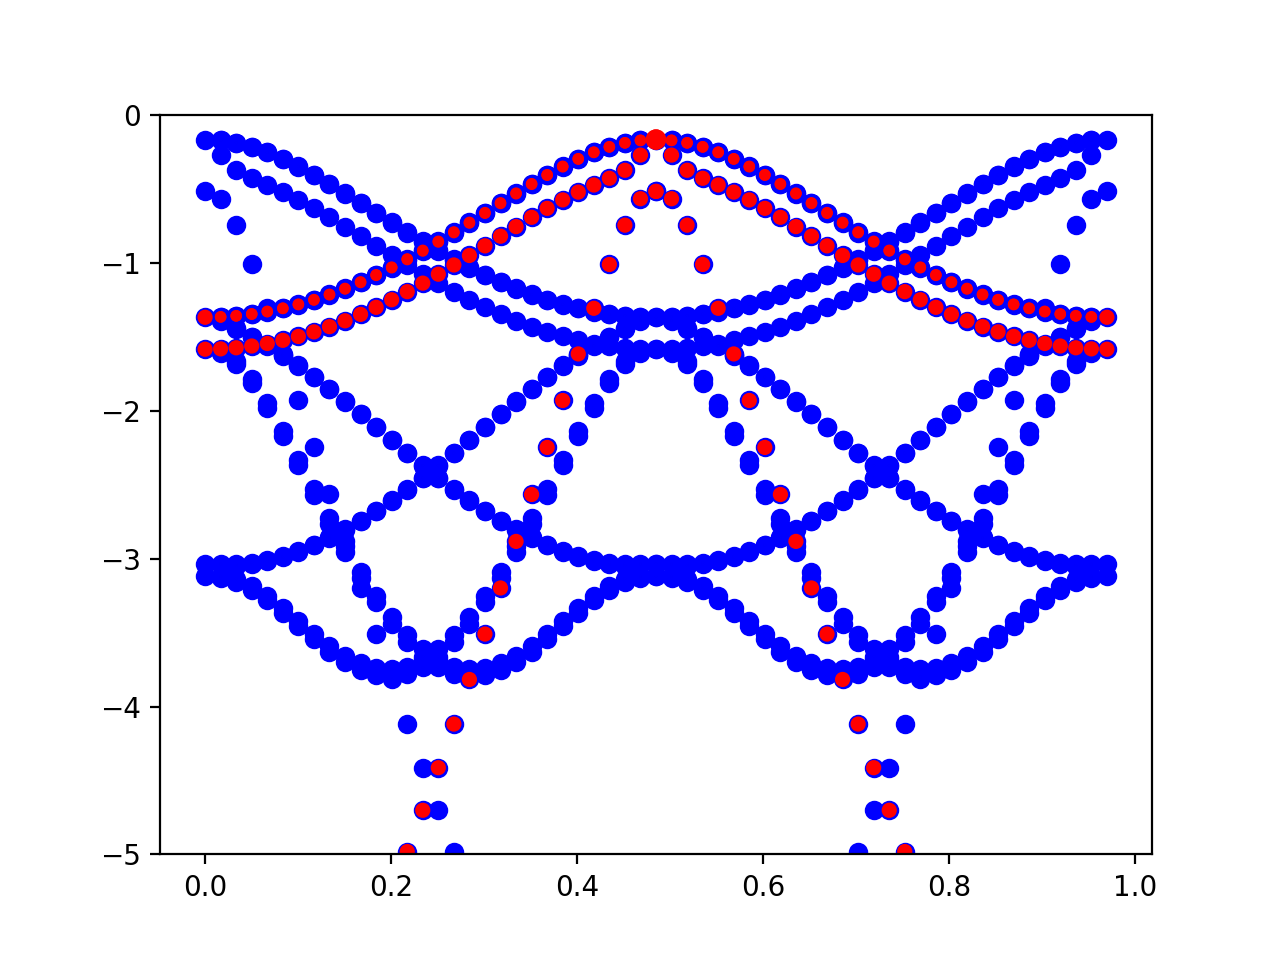

(-5.0, 0.0)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

result = np.loadtxt('bandstructure_unfolded-path.txt')
plt.figure()
fatfactor = 10
ef = 7.08
plt.scatter(result[:,0],result[:,1] -ef,color="blue",label="supercell")
plt.scatter(result[:,0],result[:,1]-ef,s=result[:,2]*fatfactor,color="red",label="unfolded")
plt.ylim(-5, 0)

<IPython.core.display.Javascript object>


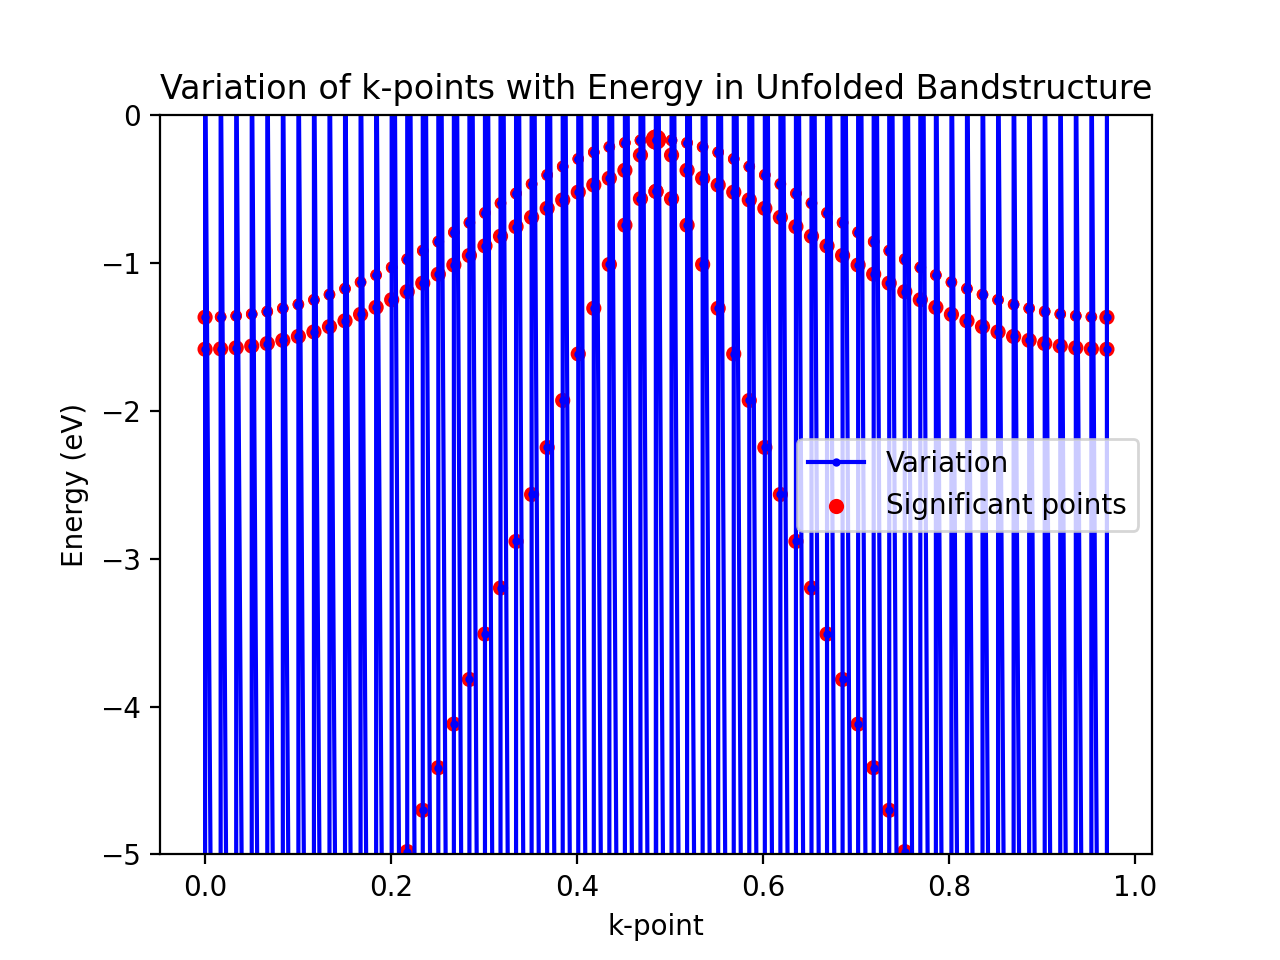

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
result = np.loadtxt('bandstructure_unfolded-path.txt')

# Extract data
k_points = result[:, 0]
energies = result[:, 1] - 7.08  # Subtracting Fermi level (ef)
weights = result[:, 2]

# Define a threshold for weights to filter significant points
weight_threshold = np.percentile(weights, 75)  # For example, take the top 25% of weights

# Filter points with significant weights
significant_indices = weights >= weight_threshold
significant_k_points = k_points[significant_indices]
significant_energies = energies[significant_indices]
significant_weights = weights[significant_indices]

# Plot the variation of k-points with energy for significant points
plt.figure()

# Scatter plot with size proportional to weights
plt.scatter(significant_k_points, significant_energies, s=significant_weights * 10, color="red", label="Significant points")

# Line plot to show variation more clearly
plt.plot(significant_k_points, significant_energies, 'bo-', markersize=2, label="Variation")

# Customization
plt.ylim(-5, 0)
plt.xlabel('k-point')
plt.ylabel('Energy (eV)')
plt.title('Variation of k-points with Energy in Unfolded Bandstructure')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


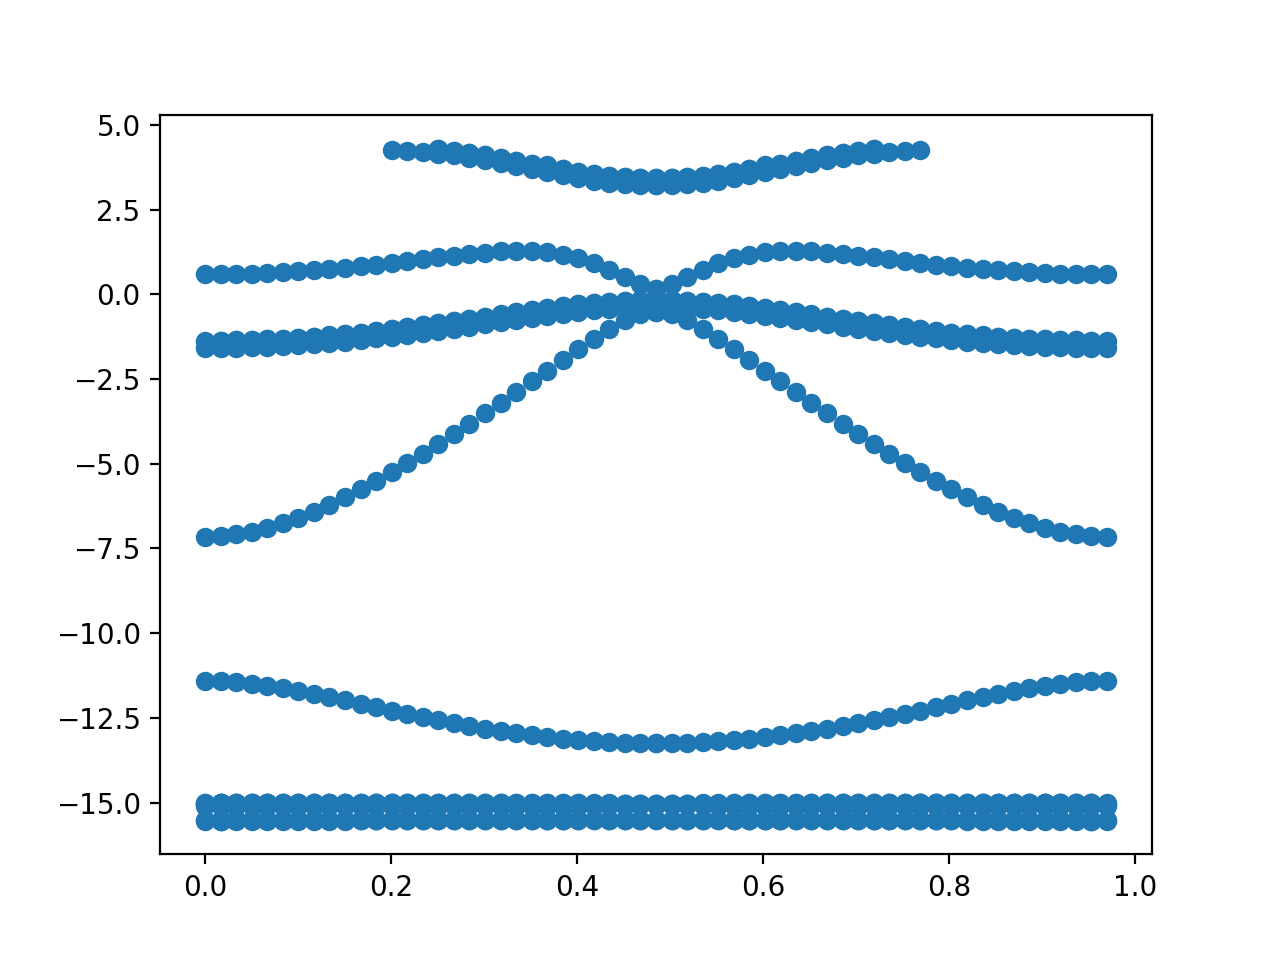

In [54]:
plt.figure()
plt.plot(significant_k_points, significant_energies, 'o')
plt.show()

In [50]:
import numpy as np

# Assuming significant_k_points, significant_energies are already defined

# Get unique k-values
unique_k_values = np.unique(significant_k_points)

# Initialize a nested list to store bands
bands = []
ks = []
# Iterate over unique k-values
for k in unique_k_values:
    # Find indices where k equals the current unique k-value
    indices = np.where(significant_k_points == k)[0]
    
    # Extract energies at these indices
    energies_at_k = significant_energies[indices]
    energies_at_k = np.array(energies_at_k)
    print(len(energies_at_k))
    # Append energies to bands list
    bands.append(list(energies_at_k))
    ks.append(k)

# Print the nested list of bands
print("Nested list of bands:")
print(bands)


11
21
18
17
17
15
16
16
15
15
14
17
17
15
16
18
17
18
18
17
18
18
21
21
19
17
19
19
18
20
18
18
18
17
20
21
21
19
18
17
18
19
18
20
18
16
19
17
14
14
16
16
16
16
17
17
18
20
10
Nested list of bands:
[[-15.53693423001254, -15.506277913668265, -15.096269836895681, -15.054130603598253, -15.011539676260401, -15.009845141564632, -11.404611093155584, -7.147232392664296, -1.5829698670554126, -1.3668470052101167, 0.5924568523358129], [-15.539359809774105, -15.536854333550421, -15.534674734078784, -15.506633168254618, -15.506272694622641, -15.506007919120018, -15.096264660154114, -15.055037326284534, -15.054081214414257, -15.053132133752342, -15.010831379154752, -15.010293871851573, -15.010005023919978, -15.009751865892277, -15.00952388216933, -11.414074695178126, -7.1306306493309295, -1.5805437272037155, -1.3645914571145994, -1.3642248679623616, 0.5949338101414003], [-15.536614616870885, -15.507006033818785, -15.50605882137167, -15.505646078651885, -15.50548170392904, -15.096246594589617, -15.

In [49]:
np.array(bands)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (59,) + inhomogeneous part.

<IPython.core.display.Javascript object>


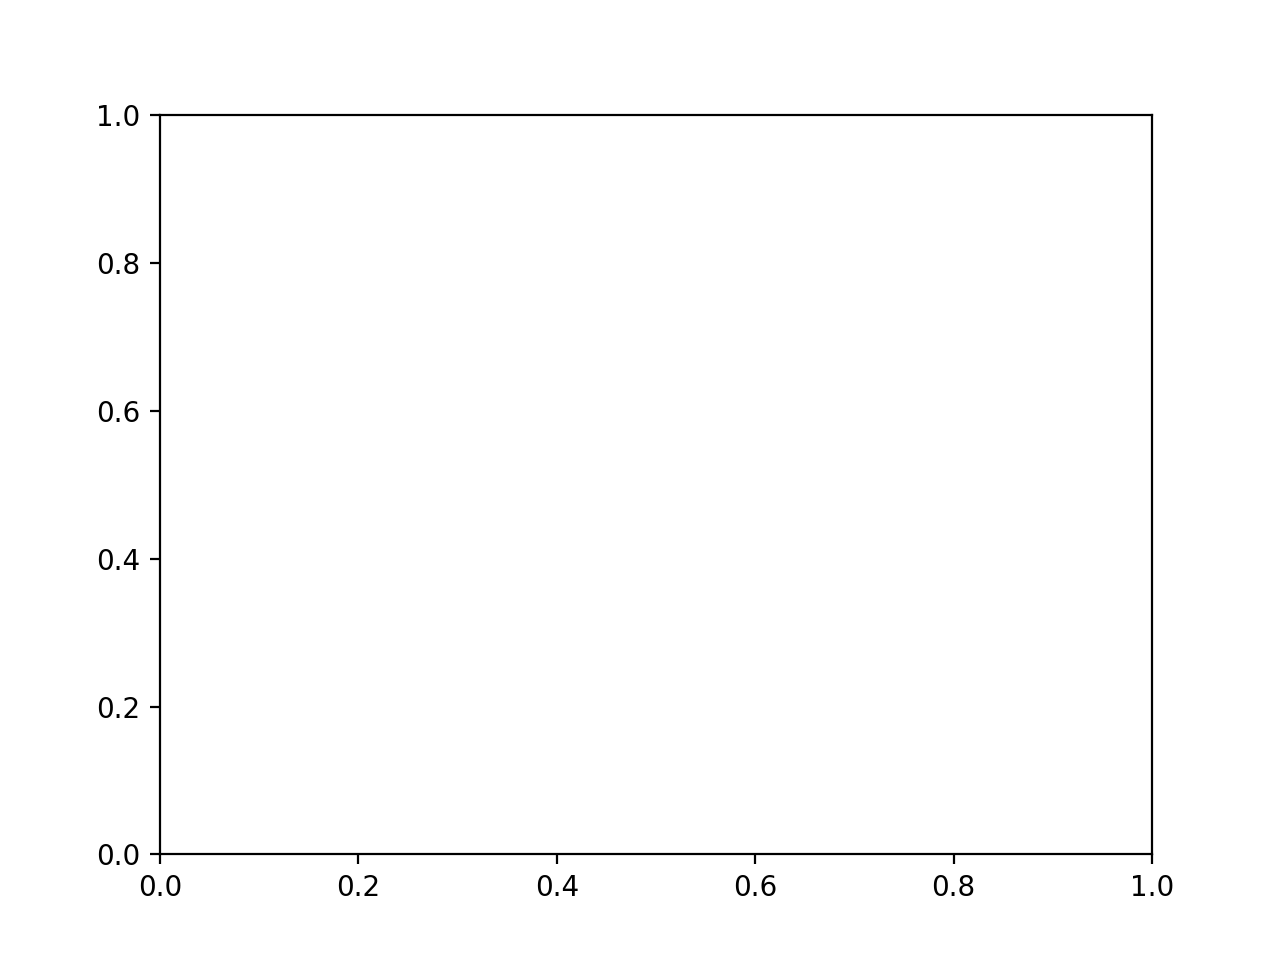

ValueError: x and y must have same first dimension, but have shapes (59,) and (11,)

In [45]:
plt.figure()
for i in range(len(bands)):
    plt.plot(ks, bands[i])
plt.show()

In [ ]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

class InteractivePlot:
    def __init__(self, root, x, y):
        self.root = root
        self.x = x
        self.y = y
        self.selected_points = []

        self.figure = Figure(figsize=(6, 4), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.line, = self.ax.plot(x, y, 'o', picker=5)  # 'picker=5' makes the points selectable

        self.canvas = FigureCanvasTkAgg(self.figure, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.canvas.mpl_connect('pick_event', self.onpick)
        self.canvas.mpl_connect('button_press_event', self.onpress)

    def onpick(self, event):
        if event.artist != self.line:
            return

        ind = event.ind
        x_values = self.x[ind]
        y_values = self.y[ind]

        for i in range(len(ind)):
            print(f'Selected point: x={x_values[i]}, y={y_values[i]}')
            self.selected_points.append((x_values[i], y_values[i]))

    def onpress(self, event):
        if event.dblclick:
            print("All selected points:")
            for point in self.selected_points:
                print(f'x={point[0]}, y={point[1]}')
            self.selected_points.clear()  # Clear the selected points after printing

def main():
    root = tk.Tk()
    root.title("Interactive Plot with Tkinter")

    x = np.arange(1, 11)
    y = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])

    plot = InteractivePlot(root, x, y)
    
    root.mainloop()

if __name__ == "__main__":
    main()


In [3]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import matplotlib.pyplot as plt

class InteractivePlot:
    def __init__(self, root, data, ef, fatfactor):
        self.root = root
        self.data = data
        self.ef = ef
        self.fatfactor = fatfactor
        self.selected_points = []

        self.figure = Figure(figsize=(6, 4), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.scatter = self.ax.scatter(data[:, 0], data[:, 1] - ef, s=data[:, 2] * fatfactor, color="red", label="unfolded", picker=True)  # 'picker=True' makes the points selectable

        self.ax.set_ylim(-5, 0)
        self.ax.legend()

        self.canvas = FigureCanvasTkAgg(self.figure, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.canvas.mpl_connect('pick_event', self.onpick)
        self.canvas.mpl_connect('button_press_event', self.onpress)

    def onpick(self, event):
        if event.artist != self.scatter:
            return

        ind = event.ind
        x_values = self.data[ind, 0]
        y_values = self.data[ind, 1] - self.ef

        for i in range(len(ind)):
            print(f'Selected point: x={x_values[i]}, y={y_values[i]}')
            self.selected_points.append((x_values[i], y_values[i]))

    def onpress(self, event):
        if event.dblclick:
            print("All selected points:")
            for point in self.selected_points:
                print(f'x={point[0]}, y={point[1]}')
            self.selected_points.clear()  # Clear the selected points after printing

def main():
    root = tk.Tk()
    root.title("Interactive Plot with Tkinter")

    # Load the data from the file
    result = np.loadtxt('bandstructure_unfolded-path.txt')
    ef = 7.08
    fatfactor = 10

    plot = InteractivePlot(root, result, ef, fatfactor)
    
    root.mainloop()

if __name__ == "__main__":
    main()


Selected point: x=0.21740173091503628, y=-4.980874588140523
Selected point: x=0.21740173091503628, y=-4.980874588140523
All selected points:
x=0.21740173091503628, y=-4.980874588140523
x=0.21740173091503628, y=-4.980874588140523
Selected point: x=0.23412494098542364, y=-4.701481006304967
Selected point: x=0.23412494098542364, y=-4.701481006304967
All selected points:
x=0.23412494098542364, y=-4.701481006304967
x=0.23412494098542364, y=-4.701481006304967
Selected point: x=0.2508481510558111, y=-4.413650533314187
Selected point: x=0.2508481510558111, y=-4.413650533314187
All selected points:
x=0.2508481510558111, y=-4.413650533314187
x=0.2508481510558111, y=-4.413650533314187
Selected point: x=0.26757136112619845, y=-4.118397167676252
Selected point: x=0.26757136112619845, y=-4.118397167676252
All selected points:
x=0.26757136112619845, y=-4.118397167676252
x=0.26757136112619845, y=-4.118397167676252
Selected point: x=0.28429457119658585, y=-3.8167004219745406
Selected point: x=0.2842945

In [13]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import matplotlib.pyplot as plt

class InteractivePlot:
    def __init__(self, root, data, ef, fatfactor):
        self.root = root
        self.data = data
        self.ef = ef
        self.fatfactor = fatfactor
        self.selected_points = []

        self.figure = Figure(figsize=(6, 4), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.scatter = self.ax.scatter(data[:, 0], data[:, 1] - ef, s=data[:, 2] * fatfactor, color="red", label="unfolded", picker=True)  # 'picker=True' makes the points selectable

        self.ax.set_ylim(-5, 0)
        self.ax.legend()

        self.canvas = FigureCanvasTkAgg(self.figure, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.canvas.mpl_connect('pick_event', self.onpick)
        self.canvas.mpl_connect('button_press_event', self.onpress)

    def onpick(self, event):
        if event.artist != self.scatter:
            return

        ind = event.ind
        x_values = self.data[ind, 0]
        y_values = self.data[ind, 1] - self.ef

        for i in range(len(ind)):
            print(f'Selected point: x={x_values[i]}, y={y_values[i]}')
            self.selected_points.append((x_values[i], y_values[i]))

    def onpress(self, event):
        if event.dblclick:
            print("All selected points:")
            for point in self.selected_points:
                print(f'x={point[0]}, y={point[1]}')
            self.selected_points.clear()  # Clear the selected points after printing

def main():
    root = tk.Tk()
    root.title("Interactive Plot with Tkinter")

    # Load the data from the file
    result = np.loadtxt('bandstructure_unfolded-path.txt')
    ef = 7.08
    fatfactor = 10

    plot = InteractivePlot(root, result, ef, fatfactor)
    
    root.mainloop()

if __name__ == "__main__":
    main()


Selected point: x=0.21740173091503628, y=-4.980874588140523
Selected point: x=0.21740173091503628, y=-4.980874588140523
All selected points:
x=0.21740173091503628, y=-4.980874588140523
x=0.21740173091503628, y=-4.980874588140523


In [12]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import numpy as np

class InteractivePlot:
    def __init__(self, root, data, ef, fatfactor):
        self.root = root
        self.data = data
        self.ef = ef
        self.fatfactor = fatfactor
        self.selected_points = []

        self.figure = Figure(figsize=(6, 4), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.scatter = self.ax.scatter(data[:, 0], data[:, 1] - ef, s=data[:, 2] * fatfactor, color="red", label="unfolded", picker=True)

        self.ax.set_ylim(-5, 0)
        self.ax.legend()

        self.canvas = FigureCanvasTkAgg(self.figure, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.canvas.mpl_connect('button_press_event', self.onpress)

        # Create the lasso selector
        self.lasso = LassoSelector(self.ax, onselect=self.onselect)
        self.canvas.draw()

    def onselect(self, verts):
        path = Path(verts)
        ind = np.nonzero(path.contains_points(self.data[:, :2]))[0]

        print("Selected points within the lasso:")
        for i in ind:
            x_value = self.data[i, 0]
            y_value = self.data[i, 1] - self.ef
            print(f'x={x_value}, y={y_value}')
            self.selected_points.append((x_value, y_value))

    def onpress(self, event):
        if event.dblclick:
            print("All selected points:")
            for point in self.selected_points:
                print(f'x={point[0]}, y={point[1]}')
            self.selected_points.clear()  # Clear the selected points after printing

def main():
    root = tk.Tk()
    root.title("Interactive Plot with Tkinter")

    # Load the data from the file
    result = np.loadtxt('bandstructure_unfolded-path.txt')
    ef = 7.08
    fatfactor = 10

    plot = InteractivePlot(root, result, ef, fatfactor)
    
    root.mainloop()

if __name__ == "__main__":
    main()


Selected points within the lasso:


In [11]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import numpy as np

class InteractivePlot:
    def __init__(self, root, data, ef, fatfactor):
        self.root = root
        self.data = data
        self.ef = ef
        self.fatfactor = fatfactor
        self.selected_points = []

        self.figure = Figure(figsize=(6, 4), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.scatter = self.ax.scatter(data[:, 0], data[:, 1] - ef, s=data[:, 2] * fatfactor, color="red", label="unfolded", picker=True)

        self.ax.set_ylim(-5, 0)
        self.ax.legend()

        self.canvas = FigureCanvasTkAgg(self.figure, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.canvas.mpl_connect('button_press_event', self.onpress)

        # Create the lasso selector
        self.lasso = LassoSelector(self.ax, onselect=self.onselect)
        self.canvas.draw()

    def onselect(self, verts):
        path = Path(verts)
        ind = np.nonzero(path.contains_points(self.data[:, :2]))[0]

        print("Selected points within the lasso:")
        self.selected_points = []
        selected_x = []
        selected_y = []

        for i in ind:
            x_value = self.data[i, 0]
            y_value = self.data[i, 1] - self.ef
            print(f'x={x_value}, y={y_value}')
            self.selected_points.append((x_value, y_value))
            selected_x.append(x_value)
            selected_y.append(y_value)
        array = {'x':selected_x, 'y':selected_y}
        print(array)

        if selected_x and selected_y:
            self.plot_selected_points(selected_x, selected_y)

    def plot_selected_points(self, x, y):
        # Create a new Tkinter window for the selected points plot
        new_window = tk.Toplevel(self.root)
        new_window.title("Selected Points Plot")

        new_figure = Figure(figsize=(6, 4), dpi=100)
        new_ax = new_figure.add_subplot(111)
        new_ax.scatter(x, y, color="blue", label="selected")
        new_ax.set_ylim(-5, 0)
        new_ax.legend()

        new_canvas = FigureCanvasTkAgg(new_figure, master=new_window)
        new_canvas.draw()
        new_canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def onpress(self, event):
        if event.dblclick:
            print("All selected points:")
            for point in self.selected_points:
                print(f'x={point[0]}, y={point[1]}')
            self.selected_points.clear()  # Clear the selected points after printing

def main():
    root = tk.Tk()
    root.title("Interactive Plot with Tkinter")

    # Load the data from the file
    result = np.loadtxt('bandstructure_unfolded-path.txt')
    ef = 7.08
    fatfactor = 10

    plot = InteractivePlot(root, result, ef, fatfactor)
    
    root.mainloop()

if __name__ == "__main__":
    main()


Selected points within the lasso:
x=0.26757136112619845, y=-11.164832853396558
x=0.26757136112619845, y=-11.161834457081596
x=0.26757136112619845, y=-11.046725475637526
x=0.26757136112619845, y=-11.044478682820271
x=0.28429457119658585, y=-11.19993930173736
x=0.28429457119658585, y=-11.19679528843676
x=0.28429457119658585, y=-11.004137554268429
x=0.28429457119658585, y=-11.002214007710096
x=0.3010177812669733, y=-11.232544601982948
x=0.3010177812669733, y=-11.22931935043993
x=0.3010177812669733, y=-10.960642578254326
x=0.3010177812669733, y=-10.959058914710925
x=0.3177409913373607, y=-11.26250162759473
x=0.3177409913373607, y=-11.259263899952881
x=0.3177409913373607, y=-10.916786135337185
x=0.3177409913373607, y=-10.915545491457765
x=0.3344642014077482, y=-11.289702853509963
x=0.3344642014077482, y=-11.286523841093024
x=0.3344642014077482, y=-10.873204295946968
x=0.3344642014077482, y=-10.872295702498244
x=0.3511874114781356, y=-11.3140733216801
x=0.3511874114781356, y=-11.311024639382